In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Trips

# <center> 2015 </center>

# Q1Q2

In [2]:
trp_2015_Q1Q2 = pd.read_csv("Data/2013 — 2019/2015/Divvy_Trips_2015-Q1Q2/Divvy_Trips_2015-Q1.csv", 
                       low_memory=False)
trp_2015_Q1Q2

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,4738454,3/31/2015 23:58,4/1/2015 0:03,1095,299,117,Wilton Ave & Belmont Ave,300,Broadway & Barry Ave,Subscriber,Male,1994.0
1,4738450,3/31/2015 23:59,4/1/2015 0:15,537,940,43,Michigan Ave & Washington St,85,Michigan Ave & Oak St,Customer,NaN,NaN
2,4738449,3/31/2015 23:59,4/1/2015 0:11,2350,751,162,Damen Ave & Wellington Ave,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1992.0
3,4738448,3/31/2015 23:59,4/1/2015 0:19,938,1240,51,Clark St & Randolph St,59,Wabash Ave & Roosevelt Rd,Customer,NaN,NaN
4,4738445,3/31/2015 23:54,4/1/2015 0:15,379,1292,134,Peoria St & Jackson Blvd,216,California Ave & Division St,Subscriber,Male,1976.0
...,...,...,...,...,...,...,...,...,...,...,...,...
202344,4413174,1/1/2015 0:13,1/1/2015 0:16,705,148,339,Emerald Ave & 31st St,280,Morgan St & 31st St,Subscriber,Male,1987.0
202345,4413172,1/1/2015 0:10,1/1/2015 0:16,1586,380,157,Lake Shore Dr & Wellington Ave,296,Broadway & Belmont Ave,Subscriber,Male,1989.0
202346,4413171,1/1/2015 0:07,1/1/2015 0:26,528,1140,283,LaSalle St & Jackson Blvd,129,Blue Island Ave & 18th St,Subscriber,Male,1987.0
202347,4413170,1/1/2015 0:08,1/1/2015 0:10,2147,111,312,Clarendon Ave & Gordon Ter,245,Clarendon Ave & Junior Ter,Subscriber,Male,1969.0


In [3]:
trp_2015_Q1Q2.starttime = pd.to_datetime(trp_2015_Q1Q2.starttime, format="%m/%d/%Y %H:%M")

In [4]:
trp_2015_Q1Q2.stoptime = pd.to_datetime(trp_2015_Q1Q2.stoptime, format="%m/%d/%Y %H:%M")

In [5]:
trp_2015_Q1Q2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202349 entries, 0 to 202348
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            202349 non-null  int64         
 1   starttime          202349 non-null  datetime64[ns]
 2   stoptime           202349 non-null  datetime64[ns]
 3   bikeid             202349 non-null  int64         
 4   tripduration       202349 non-null  int64         
 5   from_station_id    202349 non-null  int64         
 6   from_station_name  202349 non-null  object        
 7   to_station_id      202349 non-null  int64         
 8   to_station_name    202349 non-null  object        
 9   usertype           202349 non-null  object        
 10  gender             177858 non-null  object        
 11  birthyear          177858 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(5), object(4)
memory usage: 18.5+ MB


<AxesSubplot:>

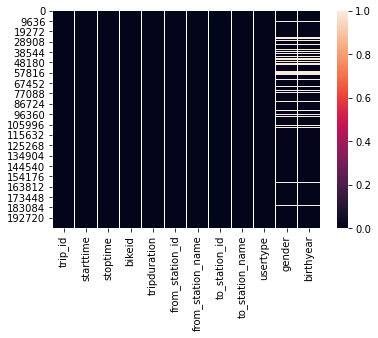

In [6]:
sns.heatmap(trp_2015_Q1Q2.isna())

The birthyear is missing in the starting of rows.

In [7]:
# Overall user number
trp_2015_Q1Q2.usertype.value_counts()

Subscriber    177834
Customer       24491
Dependent         24
Name: usertype, dtype: int64

In [8]:
trp_2015_Q1Q2[trp_2015_Q1Q2.birthyear.isna()].usertype.value_counts()

Customer    24491
Name: usertype, dtype: int64

This ↑ means that almost all users who are not SUBSCRIBER doesn't have the birth year registered.

In [9]:
trp_2015_Q1Q2.trip_id.is_unique

True

In [10]:
#DONE
trp_2015_Q1Q2 = trp_2015_Q1Q2.sort_values(by="starttime").reset_index(drop=True)

# Q3Q4

Month 07 - 08 - 09

In [112]:
trp_2015_Q307 = pd.read_csv("Data/2013 — 2019/2015/Divvy_Trips_2015_Q3Q4/Divvy_Trips_2015_07.csv", 
                       low_memory=False)

trp_2015_Q308 = pd.read_csv("Data/2013 — 2019/2015/Divvy_Trips_2015_Q3Q4/Divvy_Trips_2015_08.csv", 
                       low_memory=False)

trp_2015_Q309 = pd.read_csv("Data/2013 — 2019/2015/Divvy_Trips_2015_Q3Q4/Divvy_Trips_2015_09.csv", 
                       low_memory=False)

In [113]:
for df in [trp_2015_Q307, trp_2015_Q308, trp_2015_Q309]:
    df.starttime = pd.to_datetime(df.starttime, format="%m/%d/%Y %H:%M")
    df.stoptime = pd.to_datetime(df.stoptime, format="%m/%d/%Y %H:%M")

In [114]:
for df in [trp_2015_Q307, trp_2015_Q308, trp_2015_Q309]:
    print(df.trip_id.is_unique)

True
True
True


In [115]:
for df in [trp_2015_Q307, trp_2015_Q308, trp_2015_Q309]:
    df.sort_values(by="starttime", inplace=True)
    df.reset_index(drop=True, inplace=True)

In [116]:
# Ready 
trp_2015_Q3 = pd.concat([trp_2015_Q307, trp_2015_Q308, trp_2015_Q309])

# 

Q4

In [117]:
trp_2015_Q4 = pd.read_csv("Data/2013 — 2019/2015/Divvy_Trips_2015_Q3Q4/Divvy_Trips_2015_Q4.csv", 
                       low_memory=False)

In [118]:
trp_2015_Q4.starttime = pd.to_datetime(trp_2015_Q4.starttime, format="%m/%d/%Y %H:%M")
trp_2015_Q4.stoptime = pd.to_datetime(trp_2015_Q4.stoptime, format="%m/%d/%Y %H:%M")

In [119]:
trp_2015_Q4.trip_id.is_unique

True

In [120]:
# Ready
trp_2015_Q4.sort_values(by="starttime").reset_index(drop=True, inplace=True)

Now merging together

In [121]:
trp_2015_Q3Q4 = pd.concat([trp_2015_Q3, trp_2015_Q4]).reset_index(drop=True)

# 

Station

In [122]:
del trp_2015_Q3; del trp_2015_Q307; del trp_2015_Q308; del trp_2015_Q309; del trp_2015_Q4

In [123]:
stn_2015 = pd.read_csv("Data/2013 — 2019/2015/Divvy_Trips_2015-Q1Q2/Divvy_Stations_2015.csv", 
                       low_memory=False)
stn_2015

,id,name,latitude,longitude,dpcapacity,landmark
0,2,Michigan Ave & Balbo Ave,41.872293,-87.624091,35,541
1,3,Shedd Aquarium,41.867226,-87.615355,31,544
2,4,Burnham Harbor,41.856268,-87.613348,23,545
3,5,State St & Harrison St,41.874053,-87.627716,23,30
4,6,Dusable Harbor,41.885042,-87.612795,31,548
...,...,...,...,...,...,...
469,507,Humboldt Blvd & Armitage Ave,41.917513,-87.701809,19,651
470,508,Central Park Ave & North Ave,41.909657,-87.716632,15,652
471,509,Troy St & North Ave,41.909769,-87.705280,15,653
472,510,Spaulding Ave & Division St,41.902707,-87.709220,15,654


In [124]:
stn_2015.id.is_unique

True

In [125]:
stn_2015[['latitude', 'longitude']].duplicated().sum()

0

The station info is unique. And cleaned.

# Q1Q2

In [126]:
merged_2015_Q1Q2 = pd.merge(trp_2015_Q1Q2, stn_2015[['id', 'name']], left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2015[['id', 'name']], left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y"], axis=1)

In [127]:
merged_2015_Q1Q2.sort_values(by="starttime")

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,name_x,name_y
0,4413171,2015-01-01 00:07:00,2015-01-01 00:26:00,528,1140,283,LaSalle St & Jackson Blvd,129,Blue Island Ave & 18th St,Subscriber,Male,1987.0,LaSalle St & Jackson Blvd,Blue Island Ave & 18th St
149014,4413169,2015-01-01 00:08:00,2015-01-01 00:13:00,713,304,312,Clarendon Ave & Gordon Ter,231,Sheridan Rd & Montrose Ave,Subscriber,Male,1974.0,Clarendon Ave & Gordon Ter,Sheridan Rd & Montrose Ave
149619,4413170,2015-01-01 00:08:00,2015-01-01 00:10:00,2147,111,312,Clarendon Ave & Gordon Ter,245,Clarendon Ave & Junior Ter,Subscriber,Male,1969.0,Clarendon Ave & Gordon Ter,Clarendon Ave & Junior Ter
155361,4413172,2015-01-01 00:10:00,2015-01-01 00:16:00,1586,380,157,Lake Shore Dr & Wellington Ave,296,Broadway & Belmont Ave,Subscriber,Male,1989.0,Lake Shore Dr & Wellington Ave,Broadway & Belmont Ave
180518,4413175,2015-01-01 00:13:00,2015-01-01 00:29:00,2705,946,257,Lincoln Ave & Waveland Ave,243,Lincoln Ave & Leavitt St,Customer,NaN,NaN,Lincoln Ave & Waveland Ave,Lincoln Ave & Leavitt St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189878,4738445,2015-03-31 23:54:00,2015-04-01 00:15:00,379,1292,134,Peoria St & Jackson Blvd,216,California Ave & Division St,Subscriber,Male,1976.0,Peoria St & Jackson Blvd,California Ave & Division St
112047,4738454,2015-03-31 23:58:00,2015-04-01 00:03:00,1095,299,117,Wilton Ave & Belmont Ave,300,Broadway & Barry Ave,Subscriber,Male,1994.0,Wilton Ave & Belmont Ave,Broadway & Barry Ave
146051,4738449,2015-03-31 23:59:00,2015-04-01 00:11:00,2350,751,162,Damen Ave & Wellington Ave,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1992.0,Damen Ave & Wellington Ave,Sheffield Ave & Fullerton Ave
91001,4738450,2015-03-31 23:59:00,2015-04-01 00:15:00,537,940,43,Michigan Ave & Washington St,85,Michigan Ave & Oak St,Customer,NaN,NaN,Michigan Ave & Washington St,Michigan Ave & Oak St


In [128]:
merged_2015_Q1Q2.shape[0] == (merged_2015_Q1Q2.from_station_name == merged_2015_Q1Q2.name_x).sum()

True

In [129]:
merged_2015_Q1Q2.shape[0] == (merged_2015_Q1Q2.to_station_name == merged_2015_Q1Q2.name_y).sum()

True

In [130]:
merged_2015_Q1Q2 = pd.merge(trp_2015_Q1Q2, stn_2015, left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2015, left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y", "name_x", "name_y", "dpcapacity_x", "landmark_x", "dpcapacity_y", "landmark_y"], axis=1)

In [131]:
merged_2015_Q1Q2.rename({"latitude_x":"start_lat", 
                    "longitude_x": "start_lng",
                    "latitude_y":"end_lat", 
                    "longitude_y": "end_lng",}, axis=1, inplace=True)

In [132]:
merged_2015_Q1Q2 = merged_2015_Q1Q2.reindex(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration', 
                         'from_station_id', 'from_station_name', 'to_station_id', 
                         'to_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                         'usertype', 'gender', 'birthday'], axis=1)

# 

In [133]:
# Dropping (not considering the birth year or gender as they are the Subscriber specific.)
merged_2015_Q1Q2.drop(["gender", "birthday"], axis= 1, inplace=True)

In [134]:
merged_2015_Q1Q2 = merged_2015_Q1Q2.sort_values(by="starttime")

In [135]:
merged_2015_Q1Q2

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,start_lat,start_lng,end_lat,end_lng,usertype
0,4413171,2015-01-01 00:07:00,2015-01-01 00:26:00,528,1140,283,LaSalle St & Jackson Blvd,129,Blue Island Ave & 18th St,41.878170,-87.631985,41.857556,-87.661535,Subscriber
149014,4413169,2015-01-01 00:08:00,2015-01-01 00:13:00,713,304,312,Clarendon Ave & Gordon Ter,231,Sheridan Rd & Montrose Ave,41.957879,-87.649519,41.961670,-87.654640,Subscriber
149619,4413170,2015-01-01 00:08:00,2015-01-01 00:10:00,2147,111,312,Clarendon Ave & Gordon Ter,245,Clarendon Ave & Junior Ter,41.957879,-87.649519,41.961004,-87.649603,Subscriber
155361,4413172,2015-01-01 00:10:00,2015-01-01 00:16:00,1586,380,157,Lake Shore Dr & Wellington Ave,296,Broadway & Belmont Ave,41.936669,-87.636794,41.940106,-87.645451,Subscriber
180518,4413175,2015-01-01 00:13:00,2015-01-01 00:29:00,2705,946,257,Lincoln Ave & Waveland Ave,243,Lincoln Ave & Leavitt St,41.949110,-87.675112,41.962391,-87.684146,Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189878,4738445,2015-03-31 23:54:00,2015-04-01 00:15:00,379,1292,134,Peoria St & Jackson Blvd,216,California Ave & Division St,41.877749,-87.649633,41.903029,-87.697474,Subscriber
112047,4738454,2015-03-31 23:58:00,2015-04-01 00:03:00,1095,299,117,Wilton Ave & Belmont Ave,300,Broadway & Barry Ave,41.940180,-87.653040,41.937725,-87.644095,Subscriber
146051,4738449,2015-03-31 23:59:00,2015-04-01 00:11:00,2350,751,162,Damen Ave & Wellington Ave,67,Sheffield Ave & Fullerton Ave,41.935880,-87.678420,41.925602,-87.653708,Subscriber
91001,4738450,2015-03-31 23:59:00,2015-04-01 00:15:00,537,940,43,Michigan Ave & Washington St,85,Michigan Ave & Oak St,41.883893,-87.624649,41.900960,-87.623777,Customer


## 

# Q3Q4

In [136]:
merged_2015_Q3Q4 = pd.merge(trp_2015_Q3Q4, stn_2015[['id', 'name']], left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2015[['id', 'name']], left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y"], axis=1)

In [137]:
merged_2015_Q3Q4.sort_values(by="starttime")

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,name_x,name_y
0,5943501,2015-07-01 00:00:00,2015-07-01 00:23:00,356,1394,490,Troy St & Elston Ave,227,Southport Ave & Waveland Ave,Customer,NaN,NaN,Troy St & Elston Ave,Southport Ave & Waveland Ave
1,5943502,2015-07-01 00:00:00,2015-07-01 00:23:00,794,1338,490,Troy St & Elston Ave,227,Southport Ave & Waveland Ave,Customer,NaN,NaN,Troy St & Elston Ave,Southport Ave & Waveland Ave
594095,5943503,2015-07-01 00:02:00,2015-07-01 00:09:00,3544,422,33,State St & Van Buren St,77,Clinton St & Madison St,Subscriber,Male,1983.0,State St & Van Buren St,Clinton St & Madison St
1160060,5943505,2015-07-01 00:02:00,2015-07-01 00:09:00,4416,419,283,LaSalle St & Jackson Blvd,47,State St & Kinzie St,Subscriber,Male,1984.0,LaSalle St & Jackson Blvd,State St & Kinzie St
2,5943504,2015-07-01 00:02:00,2015-07-01 00:25:00,856,1350,490,Troy St & Elston Ave,227,Southport Ave & Waveland Ave,Customer,NaN,NaN,Troy St & Elston Ave,Southport Ave & Waveland Ave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514971,8547204,2015-12-31 23:36:00,2015-12-31 23:40:00,1928,209,141,Clark St & Lincoln Ave,301,Clark St & Schiller St,Subscriber,Male,1995.0,Clark St & Lincoln Ave,Clark St & Schiller St
481278,8547205,2015-12-31 23:37:00,2016-01-01 00:02:00,707,1513,454,Broadway & Granville Ave,303,Broadway & Cornelia Ave,Subscriber,Female,1967.0,Broadway & Granville Ave,Broadway & Cornelia Ave
1047741,8547206,2015-12-31 23:37:00,2015-12-31 23:43:00,4325,365,77,Clinton St & Madison St,38,Clark St & Lake St,Subscriber,Male,1992.0,Clinton St & Madison St,Clark St & Lake St
217285,8547209,2015-12-31 23:47:00,2015-12-31 23:53:00,3866,334,299,Halsted St & Roscoe St,117,Wilton Ave & Belmont Ave,Subscriber,Female,1991.0,Halsted St & Roscoe St,Wilton Ave & Belmont Ave


In [138]:
merged_2015_Q3Q4.shape[0] == (merged_2015_Q3Q4.from_station_name == merged_2015_Q3Q4.name_x).sum()

False

In [139]:
merged_2015_Q3Q4.shape[0] == (merged_2015_Q3Q4.to_station_name == merged_2015_Q3Q4.name_y).sum()

False

Now I am facing some problem. Here, not each location is matching with the location provided in the data.

In [140]:
not_matching = merged_2015_Q3Q4[merged_2015_Q3Q4.from_station_name != merged_2015_Q3Q4.name_x]

Looking at the non matching data, I observed that there are total 76982 rows, which are not available in the helper station table. We can't ignore the data. So I used NULL - where the matches are not found. 

This won't squeze the data. There were some name mismatch or a slight modification in names. But still that was not reliable. So for now, it is feasible to just fill data (lat and lng) to NULL.

In [190]:
merged_2015_Q3Q4 = pd.merge(trp_2015_Q3Q4, stn_2015, left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2015, left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y", "name_x", "name_y", "dpcapacity_x", "landmark_x", "dpcapacity_y", "landmark_y"], axis=1)

In [191]:
merged_2015_Q3Q4.rename({"latitude_x":"start_lat", 
                    "longitude_x": "start_lng",
                    "latitude_y":"end_lat", 
                    "longitude_y": "end_lng",}, axis=1, inplace=True)

In [192]:
merged_2015_Q3Q4 = merged_2015_Q3Q4.reindex(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration', 
                         'from_station_id', 'from_station_name', 'to_station_id', 
                         'to_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                         'usertype', 'gender', 'birthday'], axis=1)

In [193]:
# Dropping (not considering the birth year or gender as they are the Subscriber specific.)
merged_2015_Q3Q4.drop(["gender", "birthday"], axis= 1, inplace=True)

In [194]:
merged_2015_Q3Q4 = merged_2015_Q3Q4.sort_values(by="starttime")

In [236]:
merged_2015_Q3Q4

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,start_lat,start_lng,end_lat,end_lng,usertype
0,5943501,2015-07-01 00:00:00,2015-07-01 00:23:00,356,1394,490,Troy St & Elston Ave,227,Southport Ave & Waveland Ave,41.945244,-87.706650,41.948150,-87.663940,Customer
1,5943502,2015-07-01 00:00:00,2015-07-01 00:23:00,794,1338,490,Troy St & Elston Ave,227,Southport Ave & Waveland Ave,41.945244,-87.706650,41.948150,-87.663940,Customer
594095,5943503,2015-07-01 00:02:00,2015-07-01 00:09:00,3544,422,33,State St & Van Buren St,77,Clinton St & Madison St,41.877181,-87.627844,41.882242,-87.641066,Subscriber
1160060,5943505,2015-07-01 00:02:00,2015-07-01 00:09:00,4416,419,283,LaSalle St & Jackson Blvd,47,State St & Kinzie St,41.878170,-87.631985,41.889180,-87.627700,Subscriber
2,5943504,2015-07-01 00:02:00,2015-07-01 00:25:00,856,1350,490,Troy St & Elston Ave,227,Southport Ave & Waveland Ave,41.945244,-87.706650,41.948150,-87.663940,Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514971,8547204,2015-12-31 23:36:00,2015-12-31 23:40:00,1928,209,141,Clark St & Lincoln Ave,301,Clark St & Schiller St,41.915689,-87.634600,41.907993,-87.631501,Subscriber
481278,8547205,2015-12-31 23:37:00,2016-01-01 00:02:00,707,1513,454,Broadway & Granville Ave,303,Broadway & Cornelia Ave,41.994780,-87.660285,41.945512,-87.645980,Subscriber
1047741,8547206,2015-12-31 23:37:00,2015-12-31 23:43:00,4325,365,77,Clinton St & Madison St,38,Clark St & Lake St,41.882242,-87.641066,41.886021,-87.630876,Subscriber
217285,8547209,2015-12-31 23:47:00,2015-12-31 23:53:00,3866,334,299,Halsted St & Roscoe St,117,Wilton Ave & Belmont Ave,41.943670,-87.648950,41.940180,-87.653040,Subscriber


# 

In [245]:
temp = merged_2015_Q3Q4.iloc[(not_matching.index).values].copy()

In [246]:
temp.loc[:, ["start_lat","start_lng","end_lat","end_lng"]] = np.nan

In [248]:
merged_2015_Q3Q4.iloc[not_matching.index.values] = temp

In [250]:
merged_2015_Q3Q4.isna().sum()

trip_id                  0
starttime                0
stoptime                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
start_lat            76982
start_lng            76982
end_lat              76982
end_lng              76982
usertype                 0
dtype: int64

Wah!

In [255]:
_2015 = pd.concat([merged_2015_Q1Q2, merged_2015_Q3Q4]).sort_values(by="starttime").reset_index(drop=True)

In [256]:
_2015

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,start_lat,start_lng,end_lat,end_lng,usertype
0,4413171,2015-01-01 00:07:00,2015-01-01 00:26:00,528,1140,283,LaSalle St & Jackson Blvd,129,Blue Island Ave & 18th St,41.878170,-87.631985,41.857556,-87.661535,Subscriber
1,4413169,2015-01-01 00:08:00,2015-01-01 00:13:00,713,304,312,Clarendon Ave & Gordon Ter,231,Sheridan Rd & Montrose Ave,41.957879,-87.649519,41.961670,-87.654640,Subscriber
2,4413170,2015-01-01 00:08:00,2015-01-01 00:10:00,2147,111,312,Clarendon Ave & Gordon Ter,245,Clarendon Ave & Junior Ter,41.957879,-87.649519,41.961004,-87.649603,Subscriber
3,4413172,2015-01-01 00:10:00,2015-01-01 00:16:00,1586,380,157,Lake Shore Dr & Wellington Ave,296,Broadway & Belmont Ave,41.936669,-87.636794,41.940106,-87.645451,Subscriber
4,4413175,2015-01-01 00:13:00,2015-01-01 00:29:00,2705,946,257,Lincoln Ave & Waveland Ave,243,Lincoln Ave & Leavitt St,41.949110,-87.675112,41.962391,-87.684146,Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2287223,8547204,2015-12-31 23:36:00,2015-12-31 23:40:00,1928,209,141,Clark St & Lincoln Ave,301,Clark St & Schiller St,41.915689,-87.634600,41.907993,-87.631501,Subscriber
2287224,8547205,2015-12-31 23:37:00,2016-01-01 00:02:00,707,1513,454,Broadway & Granville Ave,303,Broadway & Cornelia Ave,41.994780,-87.660285,41.945512,-87.645980,Subscriber
2287225,8547206,2015-12-31 23:37:00,2015-12-31 23:43:00,4325,365,77,Clinton St & Madison St,38,Clark St & Lake St,41.882242,-87.641066,41.886021,-87.630876,Subscriber
2287226,8547209,2015-12-31 23:47:00,2015-12-31 23:53:00,3866,334,299,Halsted St & Roscoe St,117,Wilton Ave & Belmont Ave,41.943670,-87.648950,41.940180,-87.653040,Subscriber


In [257]:
_2015.to_csv("Data/CLEANED - YearWise/2015.csv", index=False)

In [258]:
del trp_2015_Q1Q2; del trp_2015_Q3Q4
del merged_2015_Q1Q2; del merged_2015_Q3Q4

# 

# <center> 2016 </center>

# Q1Q2

Q1

In [2]:
trp_2016_Q1 = pd.read_csv("Data/2013 — 2019/2016/Divvy_Trips_2016_Q1Q2/Divvy_Trips_2016_Q1.csv")

Q2

In [3]:
trp_2016_Q2_04 = pd.read_csv("Data/2013 — 2019/2016/Divvy_Trips_2016_Q1Q2/Divvy_Trips_2016_04.csv")
trp_2016_Q2_05 = pd.read_csv("Data/2013 — 2019/2016/Divvy_Trips_2016_Q1Q2/Divvy_Trips_2016_05.csv")
trp_2016_Q2_06 = pd.read_csv("Data/2013 — 2019/2016/Divvy_Trips_2016_Q1Q2/Divvy_Trips_2016_06.csv")

Both together

In [4]:
for df in [trp_2016_Q1, trp_2016_Q2_04, trp_2016_Q2_05, trp_2016_Q2_06]:
    df.starttime = pd.to_datetime(df.starttime, format="%m/%d/%Y %H:%M")
    df.stoptime = pd.to_datetime(df.stoptime, format="%m/%d/%Y %H:%M")

In [5]:
for df in [trp_2016_Q1, trp_2016_Q2_04, trp_2016_Q2_05, trp_2016_Q2_06]:
    print(df.trip_id.is_unique)

False
True
True
True


In [6]:
trp_2016_Q1.drop_duplicates(inplace=True)

In [7]:
for df in [trp_2016_Q1, trp_2016_Q2_04, trp_2016_Q2_05, trp_2016_Q2_06]:
    print(df.trip_id.is_unique)

True
True
True
True


There was only 1 row, which was duplicate.

In [8]:
for df in [trp_2016_Q1, trp_2016_Q2_04, trp_2016_Q2_05, trp_2016_Q2_06]:
    df.sort_values(by="starttime", inplace=True)
    df.reset_index(drop=True, inplace=True)

In [9]:
trp_2016_Q2 = pd.concat([trp_2016_Q2_04, trp_2016_Q2_05, trp_2016_Q2_06]).reset_index(drop=True)

# 

In [10]:
# Ready product
trp_2016_Q1Q2 = pd.concat([trp_2016_Q1, trp_2016_Q2])

In [11]:
del trp_2016_Q1; del trp_2016_Q2; del trp_2016_Q2_04; del trp_2016_Q2_05; del trp_2016_Q2_06; 

# 

Station

In [12]:
stn_2016_Q1Q2 = pd.read_csv("Data/2013 — 2019/2016/Divvy_Trips_2016_Q1Q2/Divvy_Stations_2016_Q1Q2.csv", 
                       low_memory=False)
stn_2016_Q1Q2

,id,name,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,41.991178,-87.683593,15,5/12/2015
1,101,63rd St Beach,41.781016,-87.576120,23,4/20/2015
2,109,900 W Harrison St,41.874675,-87.650019,19,8/6/2013
3,21,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15,6/21/2013
4,80,Aberdeen St & Monroe St,41.880456,-87.653929,19,6/26/2013
...,...,...,...,...,...,...
530,615,Lombard Ave & Madison St,41.879810,-87.779425,15,6/28/2016
531,610,Marion St & South Blvd,41.886810,-87.802870,19,6/30/2016
532,616,Oak Park Ave & Harrison St,41.872987,-87.793945,19,6/27/2016
533,611,Oak Park Ave & South Blvd,41.886923,-87.793899,19,6/30/2016


In [15]:
stn_2016_Q1Q2.id.is_unique

True

In [16]:
stn_2016_Q1Q2[['latitude', 'longitude']].duplicated().sum()

0

The station info is unique. And cleaned.

# Q1Q2

In [17]:
merged_2016_Q1Q2 = pd.merge(trp_2016_Q1Q2, stn_2016_Q1Q2[['id', 'name']], left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2016_Q1Q2[['id', 'name']], left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y"], axis=1)

In [18]:
merged_2016_Q1Q2.sort_values(by="starttime")

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,name_x,name_y
0,8547211,2016-01-01 00:07:00,2016-01-01 00:16:00,1094,508,419,Lake Park Ave & 53rd St,413,Woodlawn Ave & Lake Park Ave,Subscriber,Male,1965.0,Lake Park Ave & 53rd St,Woodlawn Ave & Lake Park Ave
283655,8547214,2016-01-01 00:14:00,2016-01-01 00:25:00,4339,615,190,Southport Ave & Wrightwood Ave,220,Hampden Ct & Diversey Pkwy,Subscriber,Female,1981.0,Southport Ave & Wrightwood Ave,Hampden Ct & Diversey Pkwy
822108,8547215,2016-01-01 00:15:00,2016-01-01 00:27:00,1190,744,307,Southport Ave & Clybourn Ave,213,Leavitt St & North Ave,Subscriber,Male,1994.0,Southport Ave & Clybourn Ave,Leavitt St & North Ave
534910,8547217,2016-01-01 00:16:00,2016-01-01 00:24:00,2048,484,125,Rush St & Hubbard St,133,Kingsbury St & Kinzie St,Subscriber,Female,1976.0,Rush St & Hubbard St,Kingsbury St & Kinzie St
534909,8547216,2016-01-01 00:16:00,2016-01-01 00:24:00,1530,512,125,Rush St & Hubbard St,133,Kingsbury St & Kinzie St,Subscriber,Male,1982.0,Rush St & Hubbard St,Kingsbury St & Kinzie St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348157,10426652,2016-06-30 23:58:00,2016-07-01 00:16:00,858,1081,57,Clinton St & Roosevelt Rd,215,Damen Ave & Madison St,Customer,NaN,NaN,Clinton St & Roosevelt Rd,Damen Ave & Madison St
71924,10426656,2016-06-30 23:58:00,2016-07-01 00:14:00,1858,967,90,Millennium Park,90,Millennium Park,Customer,NaN,NaN,Millennium Park,Millennium Park
439300,10426651,2016-06-30 23:58:00,2016-07-01 00:05:00,1083,446,20,Sheffield Ave & Kingsbury St,289,Wells St & Concord Ln,Subscriber,Female,1992.0,Sheffield Ave & Kingsbury St,Wells St & Concord Ln
1362003,10426654,2016-06-30 23:58:00,2016-07-01 00:22:00,4031,1445,258,Logan Blvd & Elston Ave,251,Clarendon Ave & Leland Ave,Customer,NaN,NaN,Logan Blvd & Elston Ave,Clarendon Ave & Leland Ave


In [19]:
merged_2016_Q1Q2.shape[0] == (merged_2016_Q1Q2.from_station_name == merged_2016_Q1Q2.name_x).sum()

False

In [20]:
merged_2016_Q1Q2.shape[0] == (merged_2016_Q1Q2.to_station_name == merged_2016_Q1Q2.name_y).sum()

False

## Don't Worry.

When I tried searching on those, I found that the names are having extra charecters but are the same. So no need to worry. The match is working.

In [21]:
merged_2016_Q1Q2 = pd.merge(trp_2016_Q1Q2, stn_2016_Q1Q2, left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2016_Q1Q2, left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y", "name_x", "name_y", "dpcapacity_x", "dpcapacity_y", "online_date_x", "online_date_y"], axis=1)

In [22]:
merged_2016_Q1Q2.rename({"latitude_x":"start_lat", 
                    "longitude_x": "start_lng",
                    "latitude_y":"end_lat", 
                    "longitude_y": "end_lng",}, axis=1, inplace=True)

In [23]:
merged_2016_Q1Q2 = merged_2016_Q1Q2.reindex(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration', 
                         'from_station_id', 'from_station_name', 'to_station_id', 
                         'to_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                         'usertype', 'gender', 'birthday'], axis=1)

# 

In [24]:
# Dropping (not considering the birth year or gender as they are the Subscriber specific.)
merged_2016_Q1Q2.drop(["gender", "birthday"], axis= 1, inplace=True)

In [25]:
merged_2016_Q1Q2 = merged_2016_Q1Q2.sort_values(by="starttime")

In [26]:
merged_2016_Q1Q2

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,start_lat,start_lng,end_lat,end_lng,usertype
0,8547211,2016-01-01 00:07:00,2016-01-01 00:16:00,1094,508,419,Lake Park Ave & 53rd St,413,Woodlawn Ave & Lake Park Ave,41.799494,-87.586450,41.814093,-87.597005,Subscriber
283655,8547214,2016-01-01 00:14:00,2016-01-01 00:25:00,4339,615,190,Southport Ave & Wrightwood Ave,220,Hampden Ct & Diversey Pkwy,41.928773,-87.663913,41.932620,-87.642385,Subscriber
822108,8547215,2016-01-01 00:15:00,2016-01-01 00:27:00,1190,744,307,Southport Ave & Clybourn Ave,213,Leavitt St & North Ave,41.920771,-87.663712,41.910153,-87.682290,Subscriber
534910,8547217,2016-01-01 00:16:00,2016-01-01 00:24:00,2048,484,125,Rush St & Hubbard St,133,Kingsbury St & Kinzie St,41.890011,-87.626293,41.889177,-87.638506,Subscriber
534909,8547216,2016-01-01 00:16:00,2016-01-01 00:24:00,1530,512,125,Rush St & Hubbard St,133,Kingsbury St & Kinzie St,41.890011,-87.626293,41.889177,-87.638506,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348157,10426652,2016-06-30 23:58:00,2016-07-01 00:16:00,858,1081,57,Clinton St & Roosevelt Rd,215,Damen Ave & Madison St,41.867118,-87.641088,41.881370,-87.674930,Customer
71924,10426656,2016-06-30 23:58:00,2016-07-01 00:14:00,1858,967,90,Millennium Park,90,Millennium Park,41.881032,-87.624084,41.881032,-87.624084,Customer
439300,10426651,2016-06-30 23:58:00,2016-07-01 00:05:00,1083,446,20,Sheffield Ave & Kingsbury St,289,Wells St & Concord Ln,41.910522,-87.653106,41.912133,-87.634656,Subscriber
1362003,10426654,2016-06-30 23:58:00,2016-07-01 00:22:00,4031,1445,258,Logan Blvd & Elston Ave,251,Clarendon Ave & Leland Ave,41.930584,-87.685126,41.967968,-87.650001,Customer


# 

# Q3Q4

Trips

    First we will clean both Q3 and Q4 together. Then merge each of them with the respective stations and then will merge both big tables and then save it

In [55]:
trp_2016_Q3 = pd.read_csv("Data/2013 — 2019/2016/Divvy_Trips_2016_Q3Q4/Divvy_Trips_2016_Q3.csv")
trp_2016_Q4 = pd.read_csv("Data/2013 — 2019/2016/Divvy_Trips_2016_Q3Q4/Divvy_Trips_2016_Q4.csv")

Both together

In [56]:
for df in [trp_2016_Q3, trp_2016_Q4]:
    df.starttime = pd.to_datetime(df.starttime, format="%m/%d/%Y %H:%M:%S")
    df.stoptime = pd.to_datetime(df.stoptime, format="%m/%d/%Y %H:%M:%S")

In [57]:
for df in [trp_2016_Q3, trp_2016_Q4]:
    print(df.trip_id.is_unique)

False
True


In [58]:
trp_2016_Q3.trip_id.duplicated().sum()

49

In [59]:
trp_2016_Q3[trp_2016_Q3.duplicated()].shape

(49, 12)

In [60]:
trp_2016_Q3.drop_duplicates(inplace=True)

In [61]:
for df in [trp_2016_Q3, trp_2016_Q4]:
    print(df.trip_id.is_unique)

True
True


There were only 49 row, which were duplicate.

In [62]:
for df in [trp_2016_Q3, trp_2016_Q4]:
    df.sort_values(by="starttime", inplace=True)
    df.reset_index(drop=True, inplace=True)

Stations

Q3

In [63]:
stn_2016_Q3 = pd.read_csv("Data/2013 — 2019/2016/Divvy_Trips_2016_Q3Q4/Divvy_Stations_2016_Q3.csv", 
                       low_memory=False)
stn_2016_Q3

,id,name,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,41.991178,-87.683593,15,5/12/2015
1,101,63rd St Beach,41.781016,-87.576120,23,4/20/2015
2,109,900 W Harrison St,41.874675,-87.650019,19,8/6/2013
3,21,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15,6/21/2013
4,80,Aberdeen St & Monroe St,41.880420,-87.655599,19,6/26/2013
...,...,...,...,...,...,...
576,317,Wood St & Taylor St,41.869154,-87.671045,23,9/21/2013
577,248,Woodlawn Ave & 55th St,41.795264,-87.596471,19,8/23/2013
578,569,Woodlawn Ave & 75th St,41.759160,-87.595751,15,6/23/2016
579,413,Woodlawn Ave & Lake Park Ave,41.814093,-87.597005,15,4/14/2015


# 

In [64]:
stn_2016_Q3.id.is_unique

True

In [65]:
stn_2016_Q3[['latitude', 'longitude']].duplicated().sum()

0

In [67]:
merged_2016_Q3 = pd.merge(trp_2016_Q3, stn_2016_Q3[['id', 'name']], left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2016_Q3[['id', 'name']], left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y"], axis=1)

In [68]:
merged_2016_Q3.sort_values(by="starttime")

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,name_x,name_y
0,10426658,2016-07-01 00:01:14,2016-07-01 00:03:37,5228,143,246,Ashland Ave & Belle Plaine Ave,292,Southport Ave & Clark St,Subscriber,Male,1983.0,Ashland Ave & Belle Plaine Ave,Southport Ave & Clark St
427388,10426659,2016-07-01 00:01:58,2016-07-01 00:47:30,3151,2732,177,Theater on the Lake,340,Clark St & Wrightwood Ave,Customer,NaN,NaN,Theater on the Lake,Clark St & Wrightwood Ave
875611,10426660,2016-07-01 00:02:09,2016-07-01 00:16:28,1687,860,264,Stetson Ave & South Water St,168,Michigan Ave & 14th St,Subscriber,Female,1964.0,Stetson Ave & South Water St,Michigan Ave & 14th St
875612,10426661,2016-07-01 00:02:14,2016-07-01 00:16:57,1757,884,264,Stetson Ave & South Water St,168,Michigan Ave & 14th St,Subscriber,Male,1965.0,Stetson Ave & South Water St,Michigan Ave & 14th St
369784,10426662,2016-07-01 00:02:30,2016-07-01 00:08:32,4225,362,294,Broadway & Berwyn Ave,458,Broadway & Thorndale Ave,Subscriber,Male,1980.0,Broadway & Berwyn Ave,Broadway & Thorndale Ave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147926,12150156,2016-09-30 23:59:32,2016-10-01 00:26:50,3158,1638,302,Sheffield Ave & Wrightwood Ave,492,Leavitt St & Addison St,Customer,NaN,NaN,Sheffield Ave & Wrightwood Ave,Leavitt St & Addison St
508238,12150157,2016-09-30 23:59:51,2016-10-01 00:03:56,3570,245,475,Washtenaw Ave & Lawrence Ave,471,Francisco Ave & Foster Ave,Subscriber,Female,1988.0,Washtenaw Ave & Lawrence Ave,Francisco Ave & Foster Ave
381061,12150158,2016-09-30 23:59:51,2016-10-01 00:24:51,3656,1500,302,Sheffield Ave & Wrightwood Ave,334,Lake Shore Dr & Belmont Ave,Customer,NaN,NaN,Sheffield Ave & Wrightwood Ave,Lake Shore Dr & Belmont Ave
1128897,12150160,2016-09-30 23:59:58,2016-10-01 00:04:03,4959,245,69,Damen Ave & Pierce Ave,17,Wood St & Division St,Subscriber,Male,1988.0,Damen Ave & Pierce Ave,Wood St & Division St


In [69]:
merged_2016_Q3.shape[0] == (merged_2016_Q3.from_station_name == merged_2016_Q3.name_x).sum()

True

In [70]:
merged_2016_Q3.shape[0] == (merged_2016_Q3.to_station_name == merged_2016_Q3.name_y).sum()

True

After long time!!

In [78]:
merged_2016_Q3 = pd.merge(trp_2016_Q3, stn_2016_Q3, left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2016_Q3, left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y", "name_x", "name_y", "dpcapacity_x", "dpcapacity_y", "online_date_x", "online_date_y"], axis=1)

In [79]:
merged_2016_Q3.rename({"latitude_x":"start_lat", 
                    "longitude_x": "start_lng",
                    "latitude_y":"end_lat", 
                    "longitude_y": "end_lng",}, axis=1, inplace=True)

In [80]:
merged_2016_Q3 = merged_2016_Q3.reindex(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration', 
                         'from_station_id', 'from_station_name', 'to_station_id', 
                         'to_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                         'usertype', 'gender', 'birthday'], axis=1)

# 

In [81]:
# Dropping (not considering the birth year or gender as they are the Subscriber specific.)
merged_2016_Q3.drop(["gender", "birthday"], axis= 1, inplace=True)

In [82]:
merged_2016_Q3 = merged_2016_Q3.sort_values(by="starttime")

In [83]:
merged_2016_Q3

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,start_lat,start_lng,end_lat,end_lng,usertype
0,10426658,2016-07-01 00:01:14,2016-07-01 00:03:37,5228,143,246,Ashland Ave & Belle Plaine Ave,292,Southport Ave & Clark St,41.956061,-87.668869,41.957081,-87.664199,Subscriber
427388,10426659,2016-07-01 00:01:58,2016-07-01 00:47:30,3151,2732,177,Theater on the Lake,340,Clark St & Wrightwood Ave,41.926277,-87.630834,41.929546,-87.643118,Customer
875611,10426660,2016-07-01 00:02:09,2016-07-01 00:16:28,1687,860,264,Stetson Ave & South Water St,168,Michigan Ave & 14th St,41.886835,-87.622320,41.864059,-87.623727,Subscriber
875612,10426661,2016-07-01 00:02:14,2016-07-01 00:16:57,1757,884,264,Stetson Ave & South Water St,168,Michigan Ave & 14th St,41.886835,-87.622320,41.864059,-87.623727,Subscriber
369784,10426662,2016-07-01 00:02:30,2016-07-01 00:08:32,4225,362,294,Broadway & Berwyn Ave,458,Broadway & Thorndale Ave,41.978353,-87.659753,41.989743,-87.660141,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147926,12150156,2016-09-30 23:59:32,2016-10-01 00:26:50,3158,1638,302,Sheffield Ave & Wrightwood Ave,492,Leavitt St & Addison St,41.928712,-87.653833,41.947029,-87.683367,Customer
508238,12150157,2016-09-30 23:59:51,2016-10-01 00:03:56,3570,245,475,Washtenaw Ave & Lawrence Ave,471,Francisco Ave & Foster Ave,41.968711,-87.696170,41.975633,-87.701419,Subscriber
381061,12150158,2016-09-30 23:59:51,2016-10-01 00:24:51,3656,1500,302,Sheffield Ave & Wrightwood Ave,334,Lake Shore Dr & Belmont Ave,41.928712,-87.653833,41.940775,-87.639192,Customer
1128897,12150160,2016-09-30 23:59:58,2016-10-01 00:04:03,4959,245,69,Damen Ave & Pierce Ave,17,Wood St & Division St,41.909396,-87.677692,41.903320,-87.672730,Subscriber


Q4

In [84]:
stn_2016_Q4 = pd.read_csv("Data/2013 — 2019/2016/Divvy_Trips_2016_Q3Q4/Divvy_Stations_2016_Q4.csv", 
                       low_memory=False)
stn_2016_Q4

,id,name,latitude,longitude,dpcapacity,online_date
0,456,2112 W Peterson Ave,41.991178,-87.683593,15,5/12/2015
1,101,63rd St Beach,41.781016,-87.576120,23,4/20/2015
2,109,900 W Harrison St,41.874675,-87.650019,19,8/6/2013
3,21,Aberdeen St & Jackson Blvd,41.877726,-87.654787,15,6/21/2013
4,80,Aberdeen St & Monroe St,41.880420,-87.655599,19,6/26/2013
...,...,...,...,...,...,...
576,317,Wood St & Taylor St,41.869154,-87.671045,23,9/21/2013
577,248,Woodlawn Ave & 55th St,41.795264,-87.596471,19,8/23/2013
578,569,Woodlawn Ave & 75th St,41.759160,-87.595751,15,6/23/2016
579,413,Woodlawn Ave & Lake Park Ave,41.814093,-87.597005,15,4/14/2015


# 

In [85]:
stn_2016_Q4.id.is_unique

True

In [86]:
stn_2016_Q4[['latitude', 'longitude']].duplicated().sum()

0

In [88]:
merged_2016_Q4 = pd.merge(trp_2016_Q4, stn_2016_Q4[['id', 'name']], left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2016_Q4[['id', 'name']], left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y"], axis=1)

In [89]:
merged_2016_Q4.sort_values(by="starttime")

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,name_x,name_y
0,12150161,2016-10-01 00:00:14,2016-10-01 00:16:02,5320,948,298,Lincoln Ave & Belle Plaine Ave,460,Clark St & Bryn Mawr Ave,Customer,NaN,NaN,Lincoln Ave & Belle Plaine Ave,Clark St & Bryn Mawr Ave
1,12150162,2016-10-01 00:00:32,2016-10-01 00:16:02,3567,930,298,Lincoln Ave & Belle Plaine Ave,460,Clark St & Bryn Mawr Ave,Subscriber,Female,1987.0,Lincoln Ave & Belle Plaine Ave,Clark St & Bryn Mawr Ave
212400,12150163,2016-10-01 00:00:41,2016-10-01 00:04:19,3892,218,56,Desplaines St & Kinzie St,133,Kingsbury St & Kinzie St,Subscriber,Male,1990.0,Desplaines St & Kinzie St,Kingsbury St & Kinzie St
403230,12150164,2016-10-01 00:00:58,2016-10-01 00:09:33,2483,515,255,Indiana Ave & Roosevelt Rd,4,Burnham Harbor,Subscriber,Male,1986.0,Indiana Ave & Roosevelt Rd,Burnham Harbor
212401,12150165,2016-10-01 00:01:08,2016-10-01 00:04:42,3999,214,56,Desplaines St & Kinzie St,133,Kingsbury St & Kinzie St,Subscriber,Female,1991.0,Desplaines St & Kinzie St,Kingsbury St & Kinzie St
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285054,12979224,2016-12-31 23:51:31,2017-01-01 00:07:51,4451,980,199,Wabash Ave & Grand Ave,35,Streeter Dr & Grand Ave,Subscriber,Female,1985.0,Wabash Ave & Grand Ave,Streeter Dr & Grand Ave
285055,12979225,2016-12-31 23:51:31,2017-01-01 00:07:41,504,970,199,Wabash Ave & Grand Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1985.0,Wabash Ave & Grand Ave,Streeter Dr & Grand Ave
433423,12979226,2016-12-31 23:53:07,2017-01-01 00:08:38,1026,931,195,Columbus Dr & Randolph St,25,Michigan Ave & Pearson St,Customer,NaN,NaN,Columbus Dr & Randolph St,Michigan Ave & Pearson St
433424,12979227,2016-12-31 23:53:18,2017-01-01 00:08:13,5114,895,195,Columbus Dr & Randolph St,25,Michigan Ave & Pearson St,Customer,NaN,NaN,Columbus Dr & Randolph St,Michigan Ave & Pearson St


In [99]:
merged_2016_Q4.shape[0] == (merged_2016_Q4.from_station_name.str.strip() == merged_2016_Q4.name_x.str.strip()).sum()

False

In [91]:
merged_2016_Q4.shape[0] == (merged_2016_Q4.to_station_name == merged_2016_Q4.name_y).sum()

False

In [95]:
merged_2016_Q4.from_station_name.value_counts()

Streeter Dr & Grand Ave         12366
Clinton St & Washington Blvd    10722
Clinton St & Madison St          9998
Canal St & Madison St            7592
Canal St & Adams St              7542
                                ...  
Marshfield Ave & 44th St            2
Cicero Ave & Flournoy St            2
Ellis Ave & 83rd St                 1
Exchange Ave & 79th St              1
Throop St & 52nd St                 1
Name: from_station_name, Length: 575, dtype: int64

In [96]:
merged_2016_Q4.name_x.value_counts()

Streeter Dr & Grand Ave         12366
Clinton St & Washington Blvd    10722
Clinton St & Madison St          9998
Canal St & Madison St            7592
Canal St & Adams St              7542
                                ...  
Marshfield Ave & 44th St            2
Cicero Ave & Flournoy St            2
Ellis Ave & 83rd St                 1
Exchange Ave & 79th St              1
Throop St & 52nd St                 1
Name: name_x, Length: 575, dtype: int64

In [105]:
not_matching = merged_2016_Q4[merged_2016_Q4.from_station_name != merged_2016_Q4.name_x]

In [106]:
not_matching.from_station_name.value_counts()

Clinton St & Jackson Blvd       7021
Sheffield Ave & Waveland Ave    2525
Wood St & Hubbard St             807
Name: from_station_name, dtype: int64

In [107]:
not_matching.name_x.value_counts()

Canal St & Jackson Blvd       7021
Sheffield Ave & Addison St    2525
Wood St & Grand Ave            807
Name: name_x, dtype: int64

In [108]:
not_matching = merged_2016_Q4[merged_2016_Q4.to_station_name != merged_2016_Q4.name_y]

In [110]:
not_matching.to_station_name.value_counts()

Clinton St & Jackson Blvd       6897
Sheffield Ave & Waveland Ave    3094
Wood St & Hubbard St             829
Name: to_station_name, dtype: int64

In [111]:
not_matching.name_y.value_counts()

Canal St & Jackson Blvd       6897
Sheffield Ave & Addison St    3094
Wood St & Grand Ave            829
Name: name_y, dtype: int64

Here we can see that, there is a name mismatch. But looking at the data, I don't think that will make much difference. So, going with the same.

In [112]:
merged_2016_Q4 = pd.merge(trp_2016_Q4, stn_2016_Q4, left_on='from_station_id', right_on='id', how='inner') \
                .merge(stn_2016_Q4, left_on='to_station_id', right_on='id') \
                .drop(["id_x", "id_y", "name_x", "name_y", "dpcapacity_x", "dpcapacity_y", "online_date_x", "online_date_y"], axis=1)

In [113]:
merged_2016_Q4.rename({"latitude_x":"start_lat", 
                    "longitude_x": "start_lng",
                    "latitude_y":"end_lat", 
                    "longitude_y": "end_lng",}, axis=1, inplace=True)

In [114]:
merged_2016_Q4 = merged_2016_Q4.reindex(['trip_id', 'starttime', 'stoptime', 'bikeid', 'tripduration', 
                         'from_station_id', 'from_station_name', 'to_station_id', 
                         'to_station_name', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
                         'usertype', 'gender', 'birthday'], axis=1)

# 

In [115]:
# Dropping (not considering the birth year or gender as they are the Subscriber specific.)
merged_2016_Q4.drop(["gender", "birthday"], axis= 1, inplace=True)

In [116]:
merged_2016_Q4 = merged_2016_Q4.sort_values(by="starttime")

In [117]:
merged_2016_Q4

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,start_lat,start_lng,end_lat,end_lng,usertype
0,12150161,2016-10-01 00:00:14,2016-10-01 00:16:02,5320,948,298,Lincoln Ave & Belle Plaine Ave,460,Clark St & Bryn Mawr Ave,41.955927,-87.679259,41.983593,-87.669154,Customer
1,12150162,2016-10-01 00:00:32,2016-10-01 00:16:02,3567,930,298,Lincoln Ave & Belle Plaine Ave,460,Clark St & Bryn Mawr Ave,41.955927,-87.679259,41.983593,-87.669154,Subscriber
212400,12150163,2016-10-01 00:00:41,2016-10-01 00:04:19,3892,218,56,Desplaines St & Kinzie St,133,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,Subscriber
403230,12150164,2016-10-01 00:00:58,2016-10-01 00:09:33,2483,515,255,Indiana Ave & Roosevelt Rd,4,Burnham Harbor,41.867888,-87.623041,41.856268,-87.613348,Subscriber
212401,12150165,2016-10-01 00:01:08,2016-10-01 00:04:42,3999,214,56,Desplaines St & Kinzie St,133,Kingsbury St & Kinzie St,41.888716,-87.644448,41.889177,-87.638506,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285054,12979224,2016-12-31 23:51:31,2017-01-01 00:07:51,4451,980,199,Wabash Ave & Grand Ave,35,Streeter Dr & Grand Ave,41.891738,-87.626937,41.892278,-87.612043,Subscriber
285055,12979225,2016-12-31 23:51:31,2017-01-01 00:07:41,504,970,199,Wabash Ave & Grand Ave,35,Streeter Dr & Grand Ave,41.891738,-87.626937,41.892278,-87.612043,Subscriber
433423,12979226,2016-12-31 23:53:07,2017-01-01 00:08:38,1026,931,195,Columbus Dr & Randolph St,25,Michigan Ave & Pearson St,41.884728,-87.619521,41.897660,-87.623510,Customer
433424,12979227,2016-12-31 23:53:18,2017-01-01 00:08:13,5114,895,195,Columbus Dr & Randolph St,25,Michigan Ave & Pearson St,41.884728,-87.619521,41.897660,-87.623510,Customer


In [120]:
merged_2016_Q3Q4 = pd.concat([merged_2016_Q3, merged_2016_Q4]).sort_values(by="starttime").reset_index(drop=True)

In [122]:
merged_2016_Q3Q4

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,start_lat,start_lng,end_lat,end_lng,usertype
0,10426658,2016-07-01 00:01:14,2016-07-01 00:03:37,5228,143,246,Ashland Ave & Belle Plaine Ave,292,Southport Ave & Clark St,41.956061,-87.668869,41.957081,-87.664199,Subscriber
1,10426659,2016-07-01 00:01:58,2016-07-01 00:47:30,3151,2732,177,Theater on the Lake,340,Clark St & Wrightwood Ave,41.926277,-87.630834,41.929546,-87.643118,Customer
2,10426660,2016-07-01 00:02:09,2016-07-01 00:16:28,1687,860,264,Stetson Ave & South Water St,168,Michigan Ave & 14th St,41.886835,-87.622320,41.864059,-87.623727,Subscriber
3,10426661,2016-07-01 00:02:14,2016-07-01 00:16:57,1757,884,264,Stetson Ave & South Water St,168,Michigan Ave & 14th St,41.886835,-87.622320,41.864059,-87.623727,Subscriber
4,10426662,2016-07-01 00:02:30,2016-07-01 00:08:32,4225,362,294,Broadway & Berwyn Ave,458,Broadway & Thorndale Ave,41.978353,-87.659753,41.989743,-87.660141,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125589,12979225,2016-12-31 23:51:31,2017-01-01 00:07:41,504,970,199,Wabash Ave & Grand Ave,35,Streeter Dr & Grand Ave,41.891738,-87.626937,41.892278,-87.612043,Subscriber
2125590,12979224,2016-12-31 23:51:31,2017-01-01 00:07:51,4451,980,199,Wabash Ave & Grand Ave,35,Streeter Dr & Grand Ave,41.891738,-87.626937,41.892278,-87.612043,Subscriber
2125591,12979226,2016-12-31 23:53:07,2017-01-01 00:08:38,1026,931,195,Columbus Dr & Randolph St,25,Michigan Ave & Pearson St,41.884728,-87.619521,41.897660,-87.623510,Customer
2125592,12979227,2016-12-31 23:53:18,2017-01-01 00:08:13,5114,895,195,Columbus Dr & Randolph St,25,Michigan Ave & Pearson St,41.884728,-87.619521,41.897660,-87.623510,Customer


In [125]:
_2016 = pd.concat([merged_2016_Q1Q2, merged_2016_Q3Q4]).sort_values(by="starttime").reset_index(drop=True)

In [126]:
_2016

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,start_lat,start_lng,end_lat,end_lng,usertype
0,8547211,2016-01-01 00:07:00,2016-01-01 00:16:00,1094,508,419,Lake Park Ave & 53rd St,413,Woodlawn Ave & Lake Park Ave,41.799494,-87.586450,41.814093,-87.597005,Subscriber
1,8547214,2016-01-01 00:14:00,2016-01-01 00:25:00,4339,615,190,Southport Ave & Wrightwood Ave,220,Hampden Ct & Diversey Pkwy,41.928773,-87.663913,41.932620,-87.642385,Subscriber
2,8547215,2016-01-01 00:15:00,2016-01-01 00:27:00,1190,744,307,Southport Ave & Clybourn Ave,213,Leavitt St & North Ave,41.920771,-87.663712,41.910153,-87.682290,Subscriber
3,8547217,2016-01-01 00:16:00,2016-01-01 00:24:00,2048,484,125,Rush St & Hubbard St,133,Kingsbury St & Kinzie St,41.890011,-87.626293,41.889177,-87.638506,Subscriber
4,8547216,2016-01-01 00:16:00,2016-01-01 00:24:00,1530,512,125,Rush St & Hubbard St,133,Kingsbury St & Kinzie St,41.890011,-87.626293,41.889177,-87.638506,Subscriber
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595328,12979224,2016-12-31 23:51:31,2017-01-01 00:07:51,4451,980,199,Wabash Ave & Grand Ave,35,Streeter Dr & Grand Ave,41.891738,-87.626937,41.892278,-87.612043,Subscriber
3595329,12979225,2016-12-31 23:51:31,2017-01-01 00:07:41,504,970,199,Wabash Ave & Grand Ave,35,Streeter Dr & Grand Ave,41.891738,-87.626937,41.892278,-87.612043,Subscriber
3595330,12979226,2016-12-31 23:53:07,2017-01-01 00:08:38,1026,931,195,Columbus Dr & Randolph St,25,Michigan Ave & Pearson St,41.884728,-87.619521,41.897660,-87.623510,Customer
3595331,12979227,2016-12-31 23:53:18,2017-01-01 00:08:13,5114,895,195,Columbus Dr & Randolph St,25,Michigan Ave & Pearson St,41.884728,-87.619521,41.897660,-87.623510,Customer


In [127]:
_2016.to_csv("Data/CLEANED - YearWise/2016.csv", index=False)

# 